In [34]:
import pandas as pd

df = pd.read_csv('VNL2024Men_Players.csv', encoding='latin-1')
df1 = pd.read_csv('VNL2024Men_Attackers.csv', encoding='latin-1')
df1.index += 1



In [35]:
df1.rename(columns={'Pt_Attack': 'Point_scored'}, inplace=True)
df1.rename(columns={'Tot_Attack': 'Total_attack'}, inplace=True)
df1.rename(columns={'Err_Attack': 'Error'}, inplace=True)

df1['Attack_efficiency'] = df1['Point_scored']/ df1['Total_attack']
df1 = df1.merge(df[['Name', 'Position']], on='Name', how='left')
df1.drop_duplicates(subset=['Name'], keep='first', inplace=True)
df1.to_csv('VNL2024Men_Attackers.csv', index=False)


In [38]:
df1.to_csv('VNL2024Men_Attackers.csv', index=False)
df1.head()

,Name,Team,Point_scored,Error,Att_Attack,MAvg_Attack,p_Attack,Total_attack,Attack_efficiency,Position
0,T. Stern,SLO,265,68,153,17.67,54.53,486,0.545267,O
1,Nimir,NED,235,81,138,19.58,51.76,454,0.517621,O
2,Maar,CAN,194,59,150,14.92,48.14,403,0.481390,OH
3,Cebulj,SLO,179,63,149,11.93,45.78,391,0.457801,OH
4,Yant,CUB,167,49,98,13.92,53.18,314,0.531847,OH


In [39]:
grouped = df1.groupby('Team')
grouped.first()

,Name,Point_scored,Error,Att_Attack,MAvg_Attack,p_Attack,Total_attack,Attack_efficiency,Position
Team,,,,,,,,,
ARG,Lima B.,154,60,90,11.85,50.66,304,0.506579,O
BRA,Darlan,141,52,89,10.85,50.00,282,0.500000,O
BUL,Tatarov,88,36,96,7.33,40.00,220,0.400000,OH
CAN,Maar,194,59,150,14.92,48.14,403,0.481390,OH
CUB,Yant,167,49,98,13.92,53.18,314,0.531847,OH
FRA,Patry,164,41,123,10.93,50.00,328,0.500000,O
GER,Brand,107,33,89,8.92,46.72,229,0.467249,OH
IRI,Amin,167,49,121,13.92,49.55,337,0.495549,O
ITA,Michieletto,94,21,82,11.75,47.72,197,0.477157,OH


In [41]:
# taking only Outside Hitters, Opposite Hitters and Middle Blockers since they are the attackers
df1 = df1[df1['Position'].isin(['OH', 'O', 'MB'])]
df1

,Name,Team,Point_scored,Error,Att_Attack,MAvg_Attack,p_Attack,Total_attack,Attack_efficiency,Position
0,T. Stern,SLO,265,68,153,17.67,54.53,486,0.545267,O
1,Nimir,NED,235,81,138,19.58,51.76,454,0.517621,O
2,Maar,CAN,194,59,150,14.92,48.14,403,0.481390,OH
3,Cebulj,SLO,179,63,149,11.93,45.78,391,0.457801,OH
4,Yant,CUB,167,49,98,13.92,53.18,314,0.531847,OH
...,...,...,...,...,...,...,...,...,...,...
264,Rinaldi,ITA,0,0,0,NaN,NaN,0,NaN,OH
269,Bak,NED,0,0,0,NaN,NaN,0,NaN,OH
279,Krzic,SLO,0,0,0,NaN,NaN,0,NaN,MB
280,Marovt,SLO,0,0,0,NaN,NaN,0,NaN,OH


In [42]:
df_cleaned = df1.dropna()
df_cleaned = df_cleaned.drop_duplicates(subset="Name", keep='first')

df_cleaned.to_csv('VNL2024Men_Attackers_Cleaned.csv', index=False)

In [43]:
df_block = pd.read_csv('VNL2024Men_Blockers.csv', encoding='latin-1')
df_block = df_block.merge(df[['Name', 'Position']], on='Name', how='left')
df_block.drop_duplicates(subset=['Name'], keep='first', inplace=True)
df_block.to_csv('VNL2024Men_Blockers.csv', index=False)
df_block = df_block[df_block['Position'].isin(['MB', 'O', 'OH', 'S'])]
df_block

,Name,Team,Pt_Block,Err_Block,Rebounds,MAvg_Block,p_Block,Tot_Block,Position
0,Loser Bruno,ARG,34,59,47,2.62,-17.86,140,MB
1,Le Goff,FRA,34,51,53,2.27,-12.32,138,MB
2,Flavio,BRA,33,68,51,2.75,-23.03,152,MB
3,Zerba,ARG,30,47,52,2.31,-13.18,129,MB
4,Grozdanov,BUL,29,40,55,2.42,-8.87,124,MB
...,...,...,...,...,...,...,...,...,...
285,Aslan,TUR,0,0,0,NaN,NaN,0,OH
289,Champlin,USA,0,5,3,0.00,-62.50,8,OH
292,Marshman,USA,0,2,2,0.00,-50.00,4,MB
293,Tuaniga,USA,0,7,5,0.00,-58.33,12,S


In [44]:
df_block.index += 1
df_block.rename(columns={'Pt_Block': 'Blocks_point'}, inplace=True)
df_block.rename(columns={'Tot_Block': 'Total_blocks'}, inplace=True)
df_block.rename(columns={'Err_Block': 'Error'}, inplace=True)
df_block.drop(columns=['Rebounds'], inplace=True)
df_block.drop(columns=['MAvg_Block'], inplace=True)
df_block.drop(columns=['p_Block'], inplace=True)
df_block['Block_efficiency'] = df_block['Blocks_point']/ df_block['Total_blocks']
df_block.to_csv('VNL2024Men_Blockers.csv', index=False)
df_block.head()

,Name,Team,Blocks_point,Error,Total_blocks,Position,Block_efficiency
1,Loser Bruno,ARG,34,59,140,MB,0.242857
2,Le Goff,FRA,34,51,138,MB,0.246377
3,Flavio,BRA,33,68,152,MB,0.217105
4,Zerba,ARG,30,47,129,MB,0.232558
5,Grozdanov,BUL,29,40,124,MB,0.233871


In [45]:
df_block_cleaned = df_block.dropna()
df_block_cleaned = df_block_cleaned.drop_duplicates(subset="Name", keep='first')
df_block_cleaned.to_csv('VNL2024Men_Blockers_Cleaned.csv', index=False)

In [46]:
df_scorers = pd.read_csv('VNL2024Men_Scorers.csv', encoding='latin-1')
df_scorers.index += 1
df_scorers.rename(columns={'Tot_Pts': 'Total_points'}, inplace=True)
df_scorers.rename(columns={'Tot_Atk': 'Attacks'}, inplace=True)
df_scorers.rename(columns={'Tot_Block': 'Blocks'}, inplace=True)
df_scorers.rename(columns={'Tot_Serve': 'Aces'}, inplace=True)

df_scorers = df_scorers.merge(df[['Name', 'Position']], on='Name', how='left')
df_cleaned_scorers = df_scorers.dropna()
df_cleaned_scorers = df_cleaned_scorers.drop_duplicates(subset="Name", keep='first')
df_cleaned_scorers.index += 1
df_cleaned_scorers.to_csv('VNL2024Men_Scorers_Cleaned.csv', index=False)
df_cleaned_scorers.head()


,Name,Team,Total_points,Attacks,Blocks,Aces,Position
1,Conte,ARG,121.0,101.0,11.0,9.0,OH
2,Danani,ARG,0.0,0.0,0.0,0.0,L
3,De Cecco,ARG,24.0,11.0,9.0,4.0,S
4,Gallego,ARG,2.0,1.0,1.0,0.0,MB
5,Kukartsev,ARG,42.0,37.0,4.0,1.0,O


In [47]:
df_servers = pd.read_csv('VNL2024Men_Servers.csv', encoding='latin-1')

df_servers.rename(columns={'Pt_Serve': 'Aces'}, inplace=True)
df_servers.rename(columns={'Tot_Serve': 'Total_serves'}, inplace=True)
df_servers.rename(columns={'Err_Serve': 'Error'}, inplace=True)
df_servers.drop(columns=['MAvg_Serve'], inplace=True)
df_servers.drop(columns=['p_Serve'], inplace=True)
df_servers.drop(columns=['Att_Serve'], inplace=True)

df_servers['Serve_efficiency'] = df_servers['Aces'] / df_servers['Total_serves']
df_servers = df_servers.merge(df[['Name', 'Position']], on='Name', how='left')

df_cleaned_servers = df_servers.dropna()
df_cleaned_servers = df_cleaned_servers.drop_duplicates(subset="Name", keep='first')
df_cleaned_servers.index += 1
df_cleaned_servers.to_csv('VNL2024Men_Servers_Cleaned.csv', index=False)
df_cleaned_servers.head()

,Name,Team,Aces,Error,Total_serves,Serve_efficiency,Position
1,Nimir,NED,40,56,190,0.210526,O
2,T. Stern,SLO,31,55,264,0.117424,O
3,Luburic,SRB,24,37,153,0.156863,O
4,Nishida,JPN,19,45,163,0.116564,O
5,Ropret,SLO,18,34,213,0.084507,S


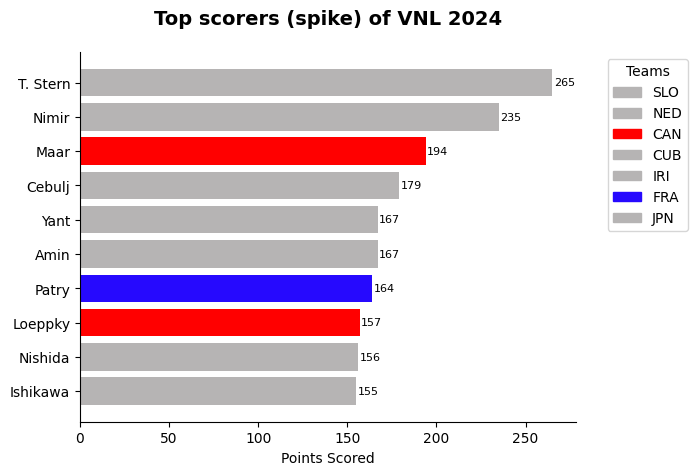

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

top10 = df_cleaned.sort_values(by="Point_scored", ascending=False).head(10)

team_color_map = {
    "SLO": "#b6b4b4",
    "NED": "#b6b4b4",
    "CUB": "#b6b4b4",
    "BRA": "#b6b4b4",
    "USA": "#b6b4b4",
    "ITA": "#b6b4b4",
    "POL": "#b6b4b4",
    "JAP": "#b6b4b4",
    "FRA": "#2609fe",
    "ARG": "#b6b4b4",
    "CAN": "red",
    "GER": "#b6b4b4",
    "IRN": "#b6b4b4"
}
bar_colors = top10["Team"].map(team_color_map).fillna('#b6b4b4')
ax = plt.gca()
plt.barh(top10['Name'], top10['Point_scored'], color=bar_colors)
plt.xlabel('Points Scored')
plt.title('Top scorers (spike) of VNL 2024', pad=20, fontsize=14, weight="bold")
ax.invert_yaxis()

for i, value in enumerate(top10['Point_scored']):
    plt.text(value + 0.8, i, str(value), va='center', fontsize=8)  


legend_handles = [
    Patch(color=team_color_map.get(team, "#b6b4b4"), label=team)
    for team in top10["Team"].unique()
]
plt.legend(handles=legend_handles, title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

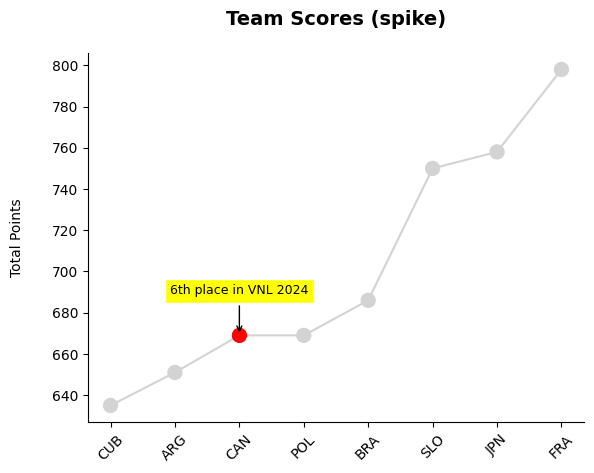

In [49]:
team_scores = df_cleaned.groupby("Team")["Point_scored"].sum().sort_values(ascending=True)
top8_teams = team_scores.tail(8)
colors = ["red" if team == "CAN" else "lightgray" for team in top8_teams.index]

plt.plot(top8_teams.index, top8_teams.values, linestyle='-', marker='o', color='lightgray')
plt.scatter(top8_teams.index, top8_teams.values, color=colors, s=100, zorder=2)
plt.xticks(rotation=45)
plt.ylabel("Total Points", labelpad=20)
plt.title("Team Scores (spike)", pad=20, fontsize=14, weight="bold")
plt.annotate(
    "6th place in VNL 2024",
    xy=("CAN", top8_teams["CAN"]),          
    xytext=(2, top8_teams["CAN"] + 20),    
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=9,
    ha='center',
    bbox=dict(facecolor='yellow', edgecolor='white')
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

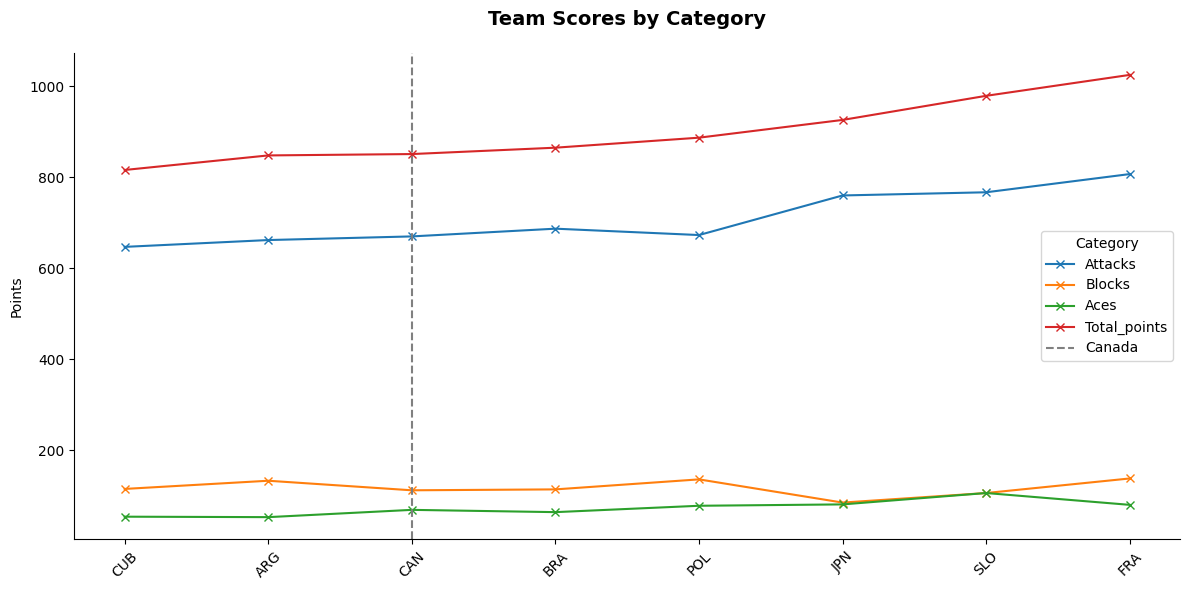

In [50]:
df_score_per = df_cleaned_scorers.groupby("Team")[["Attacks", "Blocks", "Aces"]].sum()
df_score_per["Total_points"] = df_score_per.sum(axis=1)
df_score_per = df_score_per.sort_values(by="Total_points", ascending=True).tail(8)

plt.figure(figsize=(12,6))

for col in ["Attacks", "Blocks", "Aces", "Total_points"]:
    plt.plot(df_score_per.index, df_score_per[col], marker="x", label=col)

plt.xticks(rotation=45)
can_index = list(df_score_per.index).index("CAN")   # numeric position of CAN
plt.axvline(x=can_index, color="gray", linestyle="--", linewidth=1.5, label="Canada")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("Points")
plt.title("Team Scores by Category", pad=20, fontsize=14, weight="bold")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

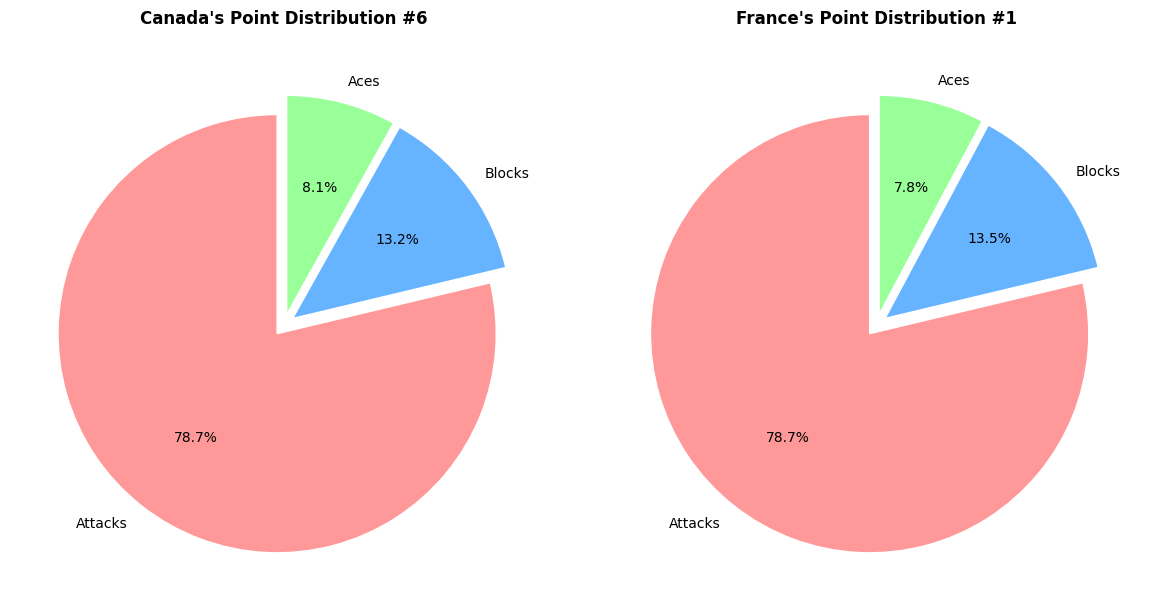

In [51]:
# Data for Canada and France
canada_scores = df_score_per.loc["CAN", ["Attacks", "Blocks", "Aces"]]
france_scores = df_score_per.loc["FRA", ["Attacks", "Blocks", "Aces"]]

labels = ["Attacks", "Blocks", "Aces"]
colors = ["#ff9999", "#66b3ff", "#99ff99"]

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(
    canada_scores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    wedgeprops=dict(edgecolor="white", linewidth=1)
)
axes[0].set_title("Canada's Point Distribution #6", pad=20, fontsize=12, weight="bold")

axes[1].pie(
    france_scores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    wedgeprops=dict(edgecolor="white", linewidth=1)
)
axes[1].set_title("France's Point Distribution #1", pad=20, fontsize=12, weight="bold")

# Adjust layout
plt.tight_layout()
plt.show()

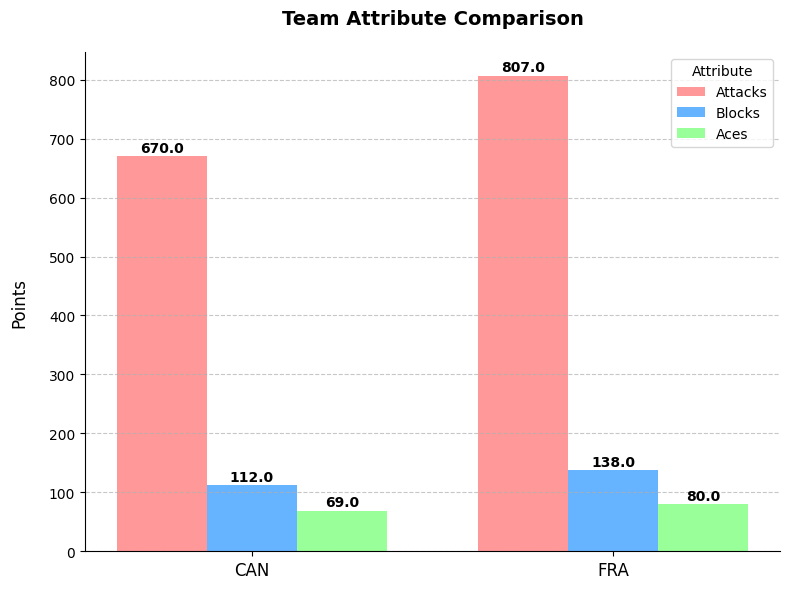

In [52]:
import numpy as np

teams = ["CAN", "FRA"]
attributes = ["Attacks", "Blocks", "Aces"]
data = df_score_per.loc[teams, attributes]

x = np.arange(len(teams))
width = 0.25 
colors = ["#ff9999", "#66b3ff", "#99ff99"]

plt.figure(figsize=(8,6))
for i, attr in enumerate(attributes):
    bars = plt.bar(x + i*width, data[attr], width=width, label=attr, color=colors[i])
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(x + width, teams, fontsize=12)
plt.ylabel("Points", labelpad=15, fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Team Attribute Comparison", pad=20, fontsize=14, weight="bold")
plt.legend(title="Attribute", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
df_att_errors = pd.read_csv('VNL2024Men_Attackers_cleaned.csv', encoding='latin-1')
df_block_errors = pd.read_csv('VNL2024Men_Blockers_cleaned.csv', encoding='latin-1')
df_serve_errors = pd.read_csv('VNL2024Men_Servers_cleaned.csv', encoding='latin-1')

df_att_errors_grouped = df_att_errors.groupby("Team")["Error"].sum()
df_block_errors_grouped = df_block_errors.groupby("Team")["Error"].sum()
df_serve_errors_grouped = df_serve_errors.groupby("Team")["Error"].sum()

df_errors = pd.DataFrame({
    "Team": df_att_errors_grouped.index,
    "Attack Errors": df_att_errors_grouped,
    "Block Errors": df_block_errors_grouped,
    "Serve Errors": df_serve_errors_grouped
})

df_errors.set_index("Team", inplace=True)
df_errors["Total_errors"] = df_errors.sum(axis=1)
df_errors = df_errors.fillna(0)
df_errors

,Attack Errors,Block Errors,Serve Errors,Total_errors
Team,,,,
ARG,192,295,196,683
BRA,189,301,210,700
BUL,193,186,216,595
CAN,173,249,226,648
CUB,180,260,199,639
FRA,214,303,289,806
GER,194,203,193,590
IRI,182,239,181,602
ITA,147,229,218,594


C:\Users\Алим\AppData\Local\Temp\ipykernel_11212\79313381.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[j] + val/2,


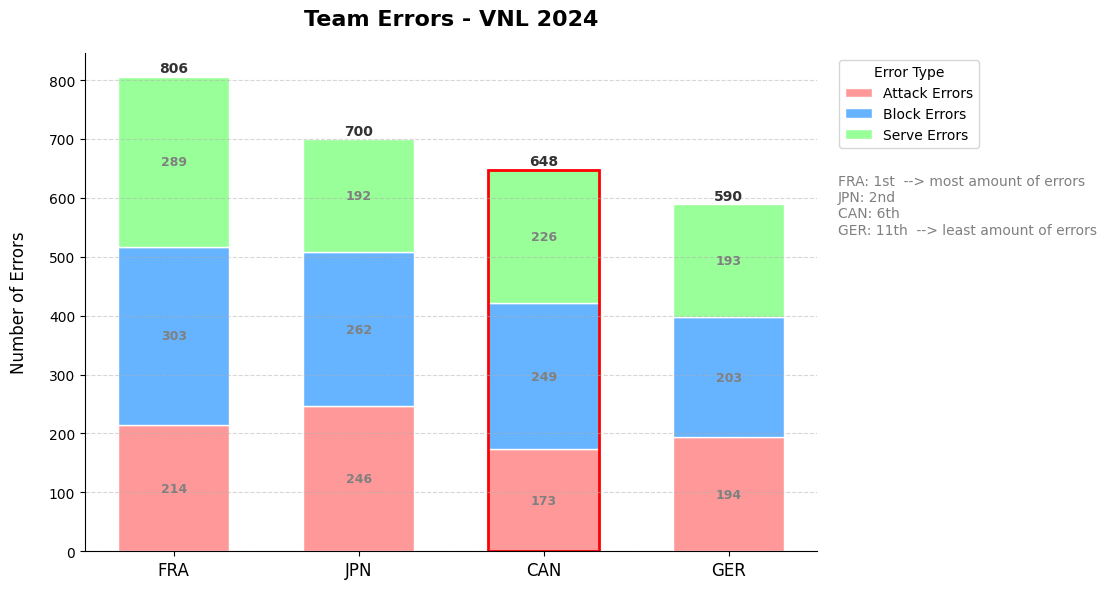

In [54]:
selected_teams = ["FRA", "JPN", "CAN", "GER"]
df_selected = df_errors.loc[selected_teams]

error_types = ["Attack Errors", "Block Errors", "Serve Errors"]
colors = ["#FF9999", "#66B3FF", "#99FF99"]

plt.figure(figsize=(10,6))
bottom = np.zeros(len(df_selected))

for i, err in enumerate(error_types):
    values = df_selected[err]
    bars = plt.bar(
        df_selected.index,
        values,
        bottom=bottom,
        color=colors[i],
        label=err,
        edgecolor="white",
        linewidth=1,
        width=0.6
    )
    
    for j, val in enumerate(values):
        plt.text(
            j,
            bottom[j] + val/2,
            int(val),
            ha='center',
            va='center',
            fontsize=9,
            color='gray',
            fontweight='bold'
        )
    bottom += values

for i, total in enumerate(df_selected["Total_errors"]):
    plt.text(
        i, total + 2, int(total),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color="#333333"
    )

can_index = list(df_selected.index).index("CAN")
plt.bar(
    df_selected.index[can_index],
    df_selected.loc["CAN", error_types].sum(),
    color='none', edgecolor='red', linewidth=2, width=0.6
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("Number of Errors", fontsize=12, labelpad=15)
plt.title("Team Errors - VNL 2024", fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Error Type", fontsize=10, bbox_to_anchor=(1.02, 1), loc='upper left')
text = {
    "FRA": "1st  --> most amount of errors",
    "JPN": "2nd",
    "CAN": "6th",
    "GER": "11th  --> least amount of errors"
}
notes = "\n".join([f"{team}: {note}" for team, note in text.items()])
plt.gcf().text(0.843, 0.7, notes, color="gray", fontsize=10, va='top')
plt.tight_layout()
plt.show()
